## Import necessary modules

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tools.eval_measures import mse, rmse
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import math

import warnings
warnings.filterwarnings('ignore')



## Set notbook's display option

In [ ]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

## Data import and exploration

In [ ]:
df = pd.read_csv(r'C:\Users\Sunil\Thinkful Data Science Projects\19.11 Supervised learning-Similarity models\Ecommerce Customers.csv')

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
#copy the dataframe
customers = df.copy()

In [ ]:
customers.shape

(500, 8)

In [ ]:
# drop the variables that are not relevant to the model
customers = customers.drop(['Email','Address'], axis = 1)


In [ ]:
customers.shape

(500, 6)

In [ ]:
customers.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avatar                500 non-null    object 
 1   Avg. Session Length   500 non-null    float64
 2   Time on App           500 non-null    float64
 3   Time on Website       500 non-null    float64
 4   Length of Membership  500 non-null    float64
 5   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [ ]:
customers.Avatar.value_counts().sort_values()
# not included in Model

PaleGoldenRod           1
Yellow                  1
PaleGreen               1
Red                     1
LawnGreen               1
NavajoWhite             1
LightGoldenRodYellow    1
PapayaWhip              1
PaleTurquoise           1
PowderBlue              1
DeepSkyBlue             1
LightSlateGray          1
MediumPurple            1
Azure                   1
CornflowerBlue          1
Coral                   1
SkyBlue                 2
FireBrick               2
DarkGray                2
Chartreuse              2
DarkSlateGray           2
Silver                  2
LightBlue               2
GoldenRod               2
AliceBlue               2
Peru                    2
LightYellow             2
ForestGreen             2
LightCoral              2
Ivory                   2
Khaki                   2
Black                   2
IndianRed               2
Linen                   2
DarkSalmon              2
Snow                    2
MediumOrchid            2
OrangeRed               2
Fuchsia     

In [ ]:
# drop Avtar, which doesn't seemed to be of any significance to explaining Y
customers.drop(['Avatar'], axis = 1, inplace = True)

In [ ]:
customers.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


## EDA

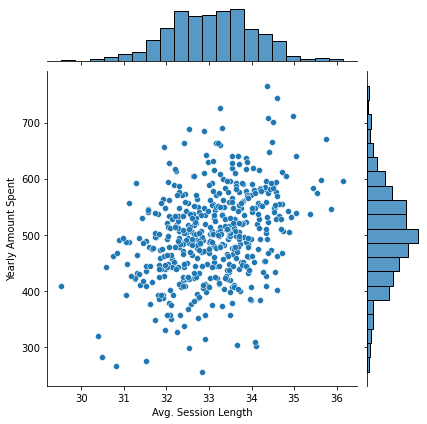

In [ ]:
# visualising via jointplot

sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent', data=customers)


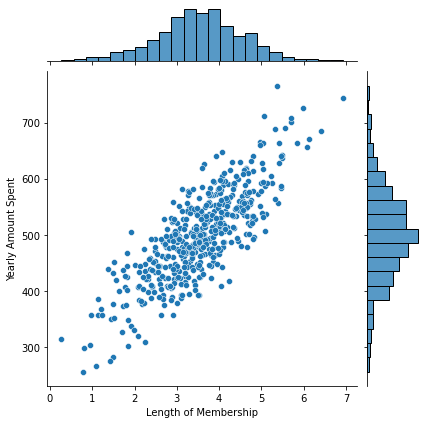

In [ ]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent', data=customers)

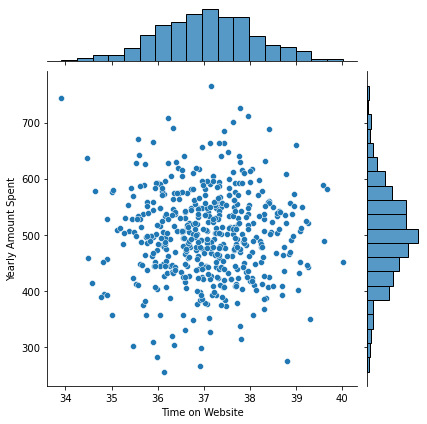

In [ ]:

sns.jointplot( x='Time on Website',y='Yearly Amount Spent',data=customers, )

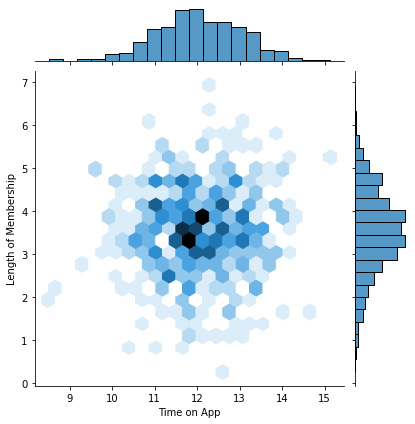

In [ ]:

sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

<AxesSubplot:>

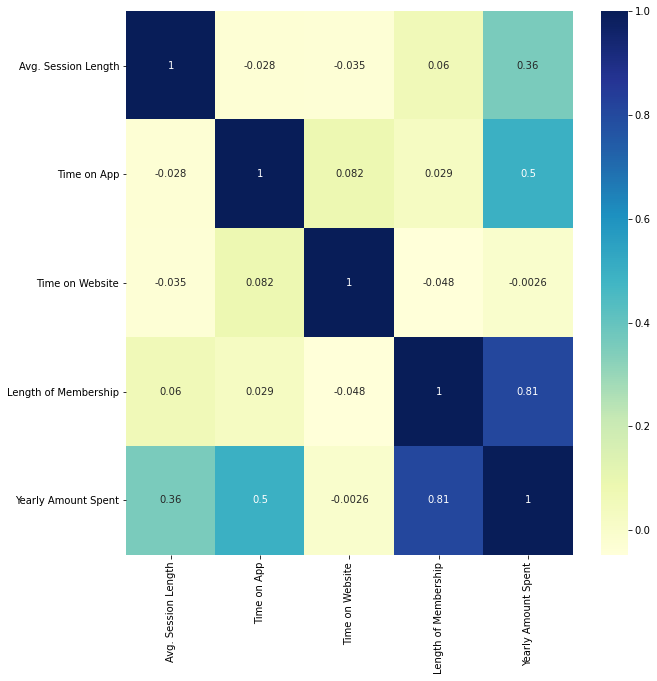

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(customers.corr(), annot = True, cmap='YlGnBu')

## Exploring data with pairplot

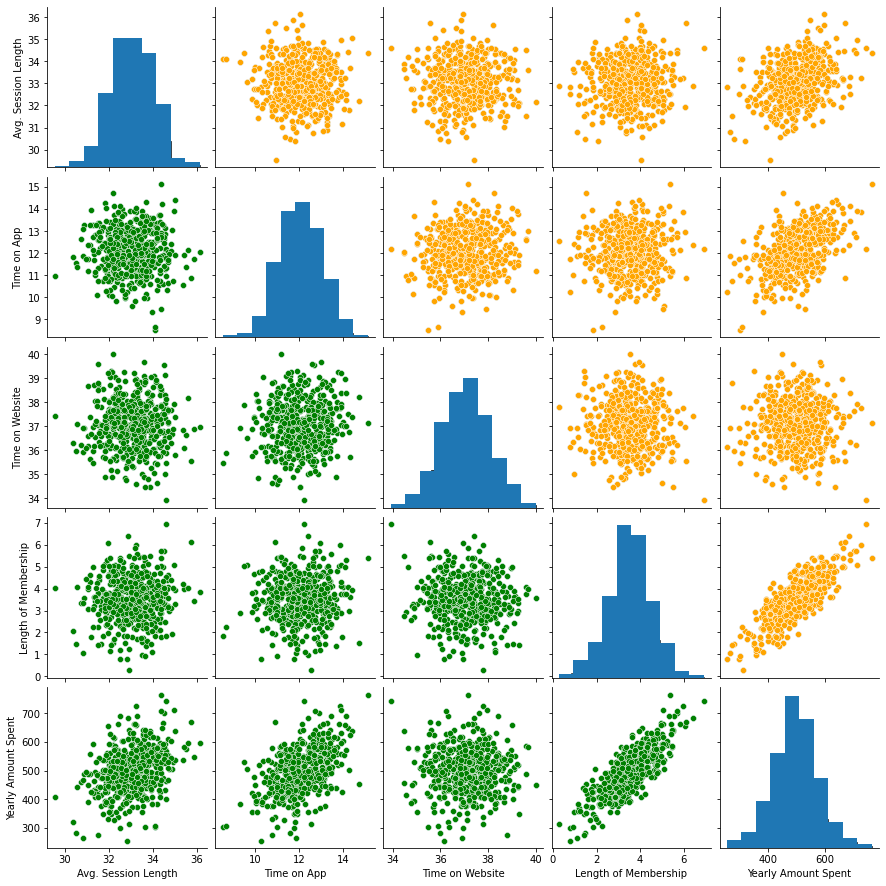

In [ ]:
g = sns.pairplot(customers)
g.map_upper(sns.scatterplot,color='orange')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

<Figure size 576x360 with 0 Axes>

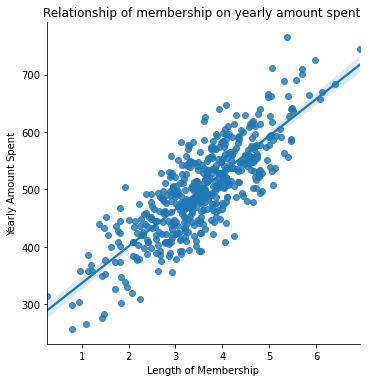

In [ ]:
#distribution plot
fig = plt.figure(figsize = (8,5))
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers).set(title='Relationship of membership on yearly amount spent ')

## Splitting the data into training and testing set

In [ ]:



X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [ ]:
# regression task with OLS
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                         19:40:19   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Avg. Session Length     25.7343      0.451     57.057      0.000      24.848      26.620
Time on App             38.7092      0.451     85.828      0.000      37.823      39.595
Time on Website          0.4367      0.444      0.983      0.326      -0.436       1.309
Length of Membership    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=65)

print('The number of observations in training set is {}'.format(X_train.shape[0]))
print('The number of observations in test set is {}'.format(X_test.shape[0]))

The number of observations in training set is 375
The number of observations in test set is 125


## OLS prediction

In [ ]:
# adding constant
X_train = sm.add_constant(X_train)

# Fit an OLS model using scikit-learn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# making predictions
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

# OLS evaluation
print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print()
print("-----Test set statistics-----")
print()
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.9839230023205251

-----Test set statistics-----

R-squared of the model in the test set is: 0.9850983586538917
Mean absolute error of the prediction is: 7.774070009366246
Mean squared error of the prediction is: 97.75853917349254
Root mean squared error of the prediction is: 9.887291801777296
Mean absolute percentage error of the prediction is: 1.621508283395702


Text(0, 0.5, 'Predicted Y')

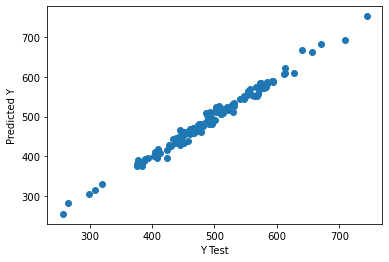

In [ ]:
# scatter plot of the real test values vs predicted values
plt.scatter(y_test,y_preds_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

[Text(0.5, 1.0, 'OLS')]

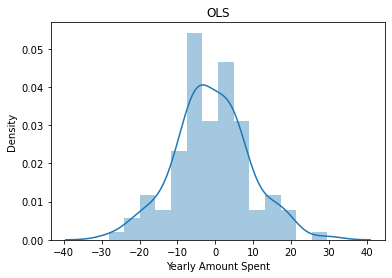

In [ ]:
# distribution of residuals
sns.distplot(y_test-y_preds_test).set(title= 'OLS')

## Comparing with KNN regression

In [ ]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import GridSearchCV

## Train Test Split

Use train_test_split to split your data into a training set and a testing set.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=65)

print('The number of observations in training set is {}'.format(X_train.shape[0]))
print('The number of observations in test set is {}'.format(X_test.shape[0]))

The number of observations in training set is 375
The number of observations in test set is 125


## Finding the best K

In [ ]:
params = {'n_neighbors':list(range(1, 21)), 'weights':['uniform','distance']}
knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [ ]:
# other method to find K
RMSE_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K, weights='distance')

    knn.fit(X_train, y_train) 
    pred=knn.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    RMSE_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 29.878921885115616
RMSE value for k=  2 is: 29.27412113648435
RMSE value for k=  3 is: 29.374210761375906
RMSE value for k=  4 is: 28.16593556935537
RMSE value for k=  5 is: 28.05445831601161
RMSE value for k=  6 is: 28.58146980910538
RMSE value for k=  7 is: 28.06175465486055
RMSE value for k=  8 is: 28.98823546701653
RMSE value for k=  9 is: 29.178660864873244
RMSE value for k=  10 is: 29.4868781325757
RMSE value for k=  11 is: 30.055113918271605
RMSE value for k=  12 is: 30.493879560482824
RMSE value for k=  13 is: 30.673106480009885
RMSE value for k=  14 is: 30.951833869524712
RMSE value for k=  15 is: 31.332877402240126
RMSE value for k=  16 is: 31.514025780340575
RMSE value for k=  17 is: 31.62498017419706
RMSE value for k=  18 is: 31.818192270756565
RMSE value for k=  19 is: 32.18619101802237
RMSE value for k=  20 is: 32.7438716540802


Text(0, 0.5, 'Error Rate')

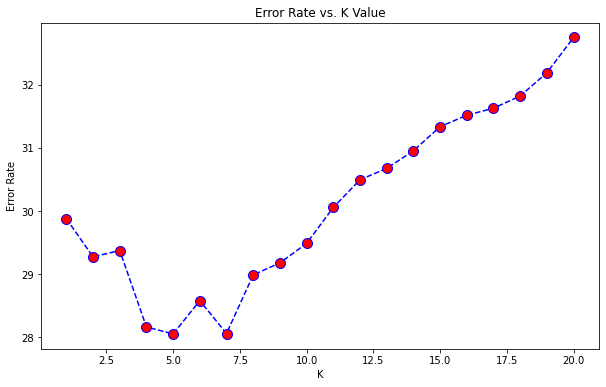

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),RMSE_val,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Applying KNN to the dataset


In [ ]:
# neighbors = 6
knn = KNeighborsRegressor(n_neighbors=6 ,weights='distance')

In [ ]:
# fit the KNN model to the training data
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6, weights='distance')

## Predictions and Evaluations

In [ ]:
pred = knn.predict(X_test)

Text(0, 0.5, 'Predicted Y')

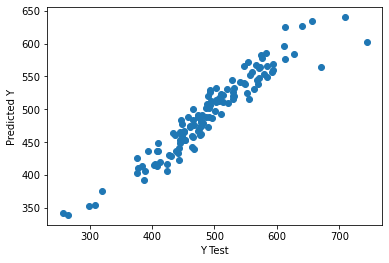

In [ ]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print('Root Mean Squared Error(MSE) is: {:.3f}'.format(sqrt(mean_squared_error(y_test, pred))))
print('R-squared is: {:.3f}'.format(r2_score(y_test, pred)))


Root Mean Squared Error(MSE) is: 28.581
R-squared is: 0.875


### Validating KNN

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=5)
print(" Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

 Accuracy: 0.89 (+/- 0.03)


In [ ]:
customers.head(1)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054


## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
    
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors = 6))

y_pred = cross_val_predict(classifier_pipeline, X_train, y_train, cv=5)
print(sqrt(mean_squared_error(y_train,y_pred)))
print(r2_score(y_train,y_pred))

25.486119882705463
0.8945276475212289


### Are there any differences in the model?


#### KNN regression

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits = 5, random_state = None, shuffle=False)

classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=6))
y_pred1 = cross_val_predict(classifier_pipeline, X_train, y_train, cv=cv)
print(sqrt(mean_squared_error(y_train,y_pred1)))
print(r2_score(y_train,y_pred1))

25.486119882705463
0.8945276475212289


#### OLS regression

In [ ]:
classifier_pipeline = make_pipeline(StandardScaler(), LinearRegression())
y_pred2 = cross_val_predict(classifier_pipeline, X_train, y_train, cv=cv)
print(sqrt(mean_squared_error(y_train,y_pred2)))
print(r2_score(y_train,y_pred2))

10.06139821805761
0.9835620420232144


#### Note

* Both KNN and OLS performed good with respect to the R-squared as well as accuracy score in KNN.
* The model shows differences in the output using OLS and KNN. 
* OLS performed better than KNN considering both RMSE and R-squared.
* Scaling the variables improved R-squared and RMSE but that didn't suffice to make the model best.
* As the model doesn't seemed to be a good one. Reconsidering the variable inclusion and transformation might help to improve the best fit. 

